In [1]:
import pandas as pd
df = pd.read_csv("/content/sample_data/Sales Data - RevoU.csv")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,30,100.00,1/6/2003 0:00,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,50,67.80,1/6/2003 0:00,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,22,86.51,1/6/2003 0:00,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,49,34.47,1/6/2003 0:00,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,25,100.00,1/9/2003 0:00,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2824 non-null   int64  
 1   QUANTITYORDERED  2824 non-null   int64  
 2   PRICEEACH        2824 non-null   float64
 3   ORDERDATE        2824 non-null   object 
 4   STATUS           2824 non-null   object 
 5   PRODUCTLINE      2824 non-null   object 
 6   PRODUCTCODE      2824 non-null   object 
 7   CUSTOMERNAME     2824 non-null   object 
 8   CITY             2824 non-null   object 
 9   DEALSIZE         2824 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 220.8+ KB


In [3]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERDATE,datetime64[ns]
STATUS,object
PRODUCTLINE,object
PRODUCTCODE,object
CUSTOMERNAME,object
CITY,object
DEALSIZE,object


In [4]:
df.describe(include="all")

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
count,2824.000000,2824.000000,2824.000000,2824,2824,2824,2824,2824,2824,2824
unique,NaN,NaN,NaN,NaN,6,7,109,92,73,3
top,NaN,NaN,NaN,NaN,Shipped,Classic Cars,S18_3232,Euro Shopping Channel,Madrid,Medium
freq,NaN,NaN,NaN,NaN,2618,967,52,259,304,1384
mean,10258.672805,35.090297,83.651700,2004-05-10 20:46:13.937676928,NaN,NaN,NaN,NaN,NaN,NaN
min,10100.000000,6.000000,26.880000,2003-01-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
25%,10180.000000,27.000000,68.795000,2003-11-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
50%,10262.000000,35.000000,95.695000,2004-06-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
75%,10333.250000,43.000000,100.000000,2004-11-17 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
max,10425.000000,97.000000,100.000000,2005-05-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


In [6]:
categorical_features = df.select_dtypes(include='object').columns
categorical_features.isna().sum()

0

In [7]:
numeric_features = df.select_dtypes(include='number').columns

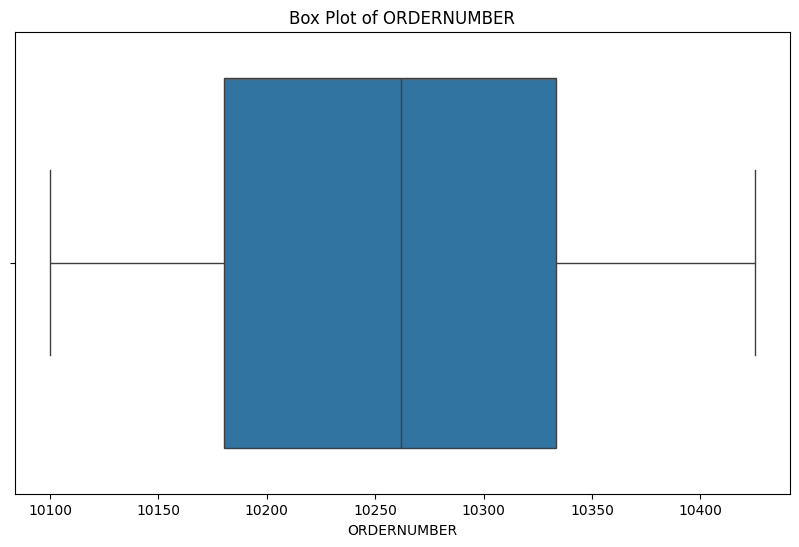

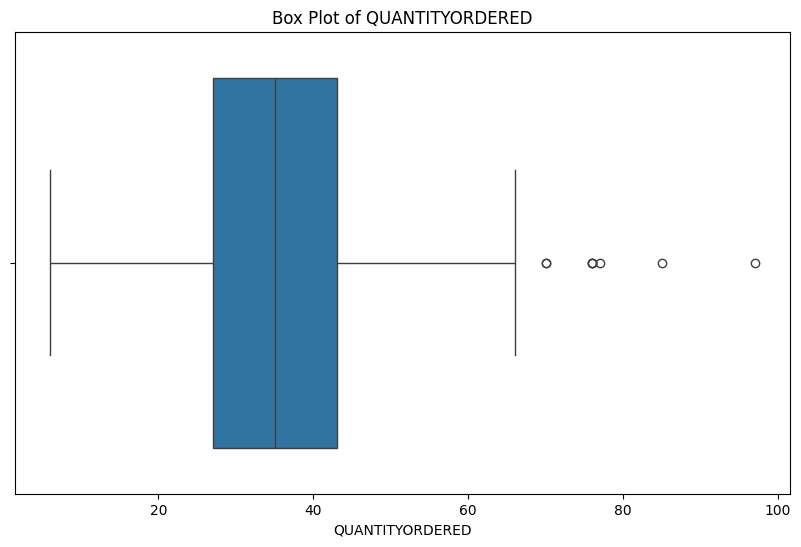

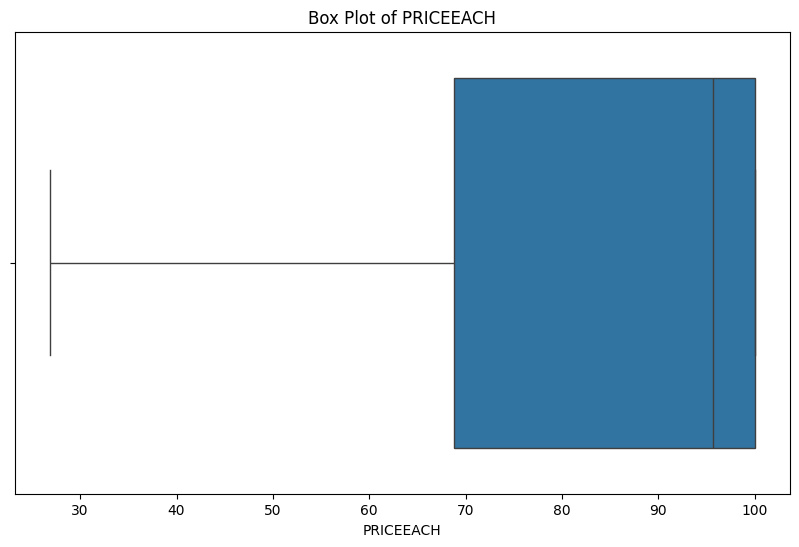

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for feature in numeric_features:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()

# Question #1
Highest & Lowest Sales of Product Lines

In [9]:
# New column for Total_Sales by multiplying Quantity_Ordered with Price_Each
df['TOTALSALES'] = df['QUANTITYORDERED'] * df['PRICEEACH']

# Group Total_Sales by Product_Line to get sales per product category
sales_by_product = df.groupby('PRODUCTLINE')['TOTALSALES'].sum().reset_index()

In [10]:
# Find the highest and lowest sales of product line sellings
sales_by_product = sales_by_product.sort_values(by = 'TOTALSALES', ascending = False)

# Get the highest and lowest
highest_sales = sales_by_product.iloc[0]
lowest_sales = sales_by_product.iloc[-1]
print(f"highest_sales is {highest_sales['PRODUCTLINE']} with total_sales is {highest_sales['TOTALSALES']}")
print(f"lowest_sales is {lowest_sales['PRODUCTLINE']} with total_sales is {lowest_sales['TOTALSALES']}")

highest_sales is Classic Cars with total_sales is 2968546.4
lowest_sales is Trains with total_sales is 203804.26


<ipython-input-11-31074d426c95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='TOTALSALES', y='PRODUCTLINE', data=sales_by_product, palette='viridis')


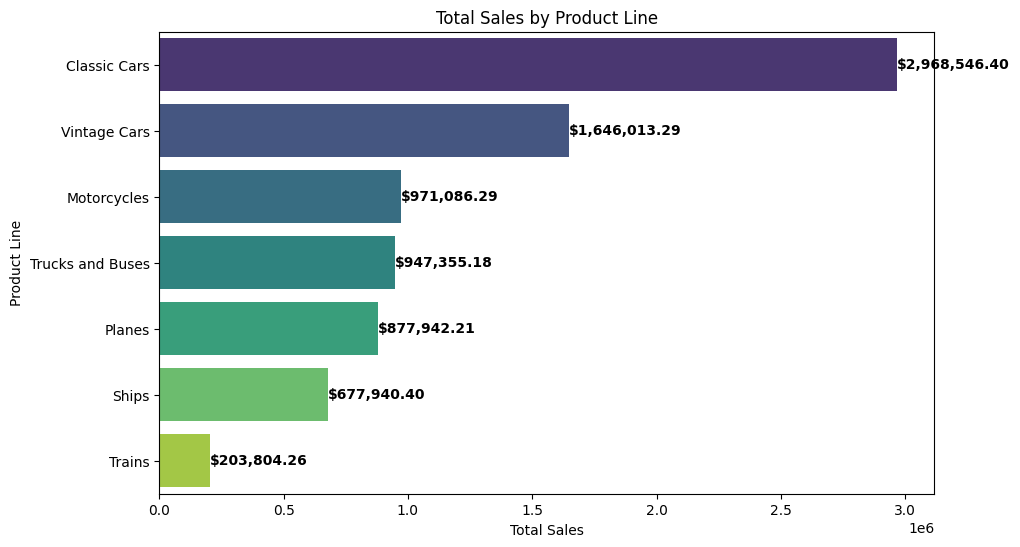

In [11]:
# Create the visualization using a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='TOTALSALES', y='PRODUCTLINE', data=sales_by_product, palette='viridis')

# Add exact values inside bars
for index, value in enumerate(sales_by_product['TOTALSALES']):
    ax.text(value, index, f'${value:,.2f}', va='center', fontsize=10, color='black', fontweight='bold')

plt.title('Total Sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.show()

# Question #2
Sales Performance Pattern Overtime

In [12]:
# Extract the ORDERDATE to get the 'Month-Year' format("January 2023")
df['MONTHYEAR'] = df['ORDERDATE'].dt.strftime('%B %Y')

In [13]:
# Group Total_Sales by Month_Year to get the aggregate sales by date format
monthly_order_by_sales = df.groupby('MONTHYEAR', observed=False)['TOTALSALES'].sum().reset_index()

# Convert back the Month_Year to datetime for sorting purposes
monthly_order_by_sales['MONTHYEAR'] = pd.to_datetime(monthly_order_by_sales['MONTHYEAR'], format='%B %Y')

# Sorting
monthly_order_by_sales = monthly_order_by_sales.sort_values(by='MONTHYEAR')

# Converting back to string format for plotting purposes
monthly_order_by_sales['MONTHYEAR'] = monthly_order_by_sales['MONTHYEAR'].dt.strftime('%B %Y')

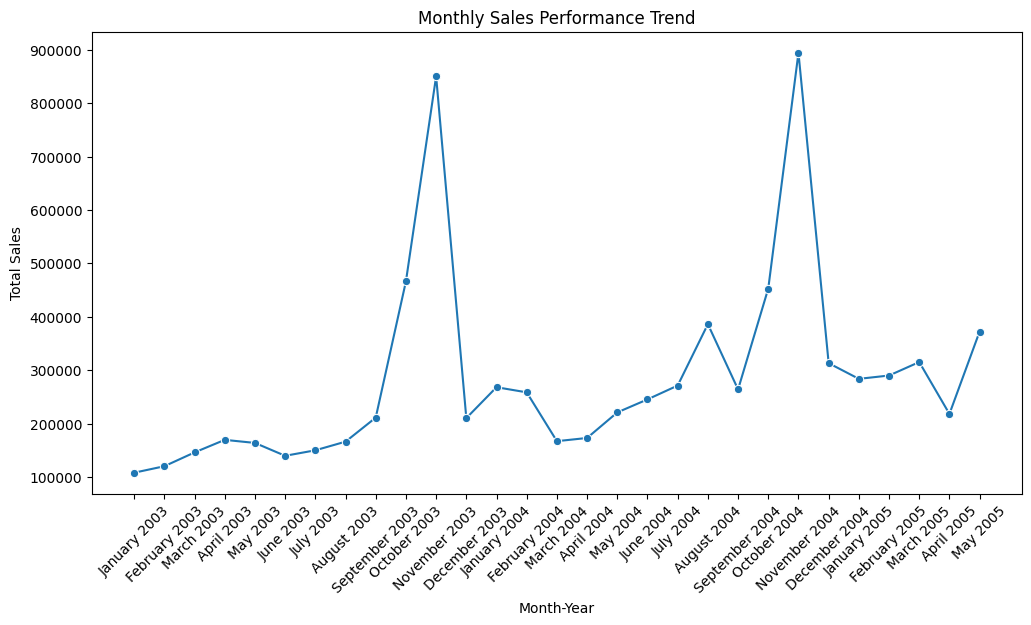

In [14]:
# Plotting line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='MONTHYEAR', y='TOTALSALES', data=monthly_order_by_sales, marker='o')
plt.title('Monthly Sales Performance Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

As we can see above, there's the visualization for the sales trend performance over time. We can notice that there's some sort of pattern repeated for 2 years in the range from August to November, which makes the line highly spike to the top. This pattern can show some phenomenon where people in Europe, especially in Germany, want to purchase many kinds of things for their event preparation around that month, such as Halloween celebrations and also Christmas celebrations. So that's why the sales performance very high at that time.

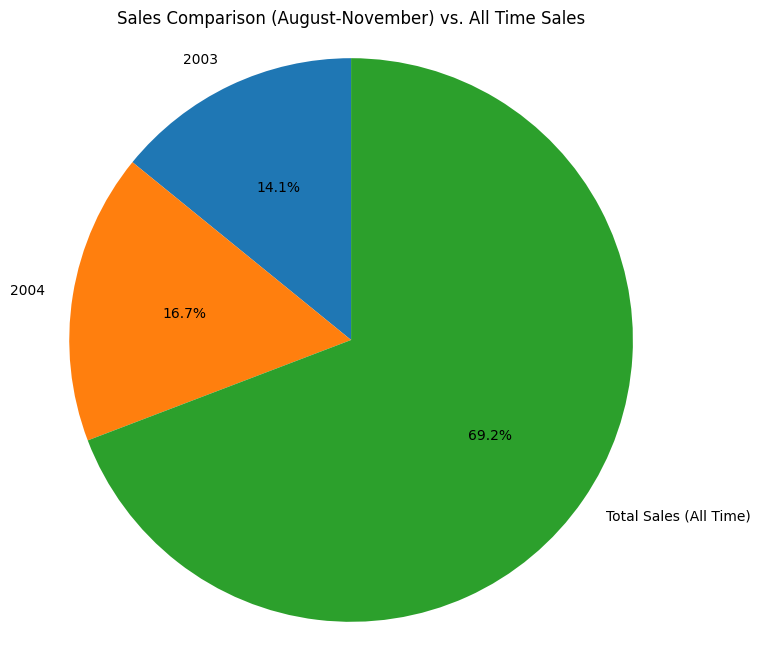

In [15]:
# Filter data for August to November
df['MONTH'] = df['ORDERDATE'].dt.month
aug_nov_sales = df[(df['MONTH'] >= 8) & (df['MONTH'] <= 11)]

# Group by year and month, then sum total sales
yearly_sales = aug_nov_sales.groupby(aug_nov_sales['ORDERDATE'].dt.year)['TOTALSALES'].sum()

# Calculate total sales across all time
total_sales_all_time = df['TOTALSALES'].sum()

# Pie chart
sales_data = yearly_sales.to_dict()
sales_data['Total Sales (All Time)'] = total_sales_all_time

labels = list(sales_data.keys())
sizes = list(sales_data.values())

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Sales Comparison (August-November) vs. All Time Sales')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

As we can see above, almost 30% of sales performance comes from the range of August to November for 2 years(2003 & 2004) compared to the all sales performance. So, there's some significant sentiment around that range of month for every year that effect the sales performance which causes by the public celebration in Germany.

# Question #3
Deal Size Correlation with Total Sales by showing Percentage of Contribution for each type of deal

In [16]:
# Group Total_Sales by Deal_Size to get sales per deal size
sales_by_deal = df.groupby('DEALSIZE')['TOTALSALES'].sum().reset_index()

In [17]:
# Calculate the percentage of contribution
sales_by_deal['PERCENTAGE'] = (sales_by_deal['TOTALSALES'] / sales_by_deal['TOTALSALES'].sum()) * 100

In [18]:
# Create labels with both sales amount and percentage contribution
labels = [f"{deal}:\n${sales:,.2f}" for deal, sales in zip(sales_by_deal['DEALSIZE'], sales_by_deal['TOTALSALES'])]

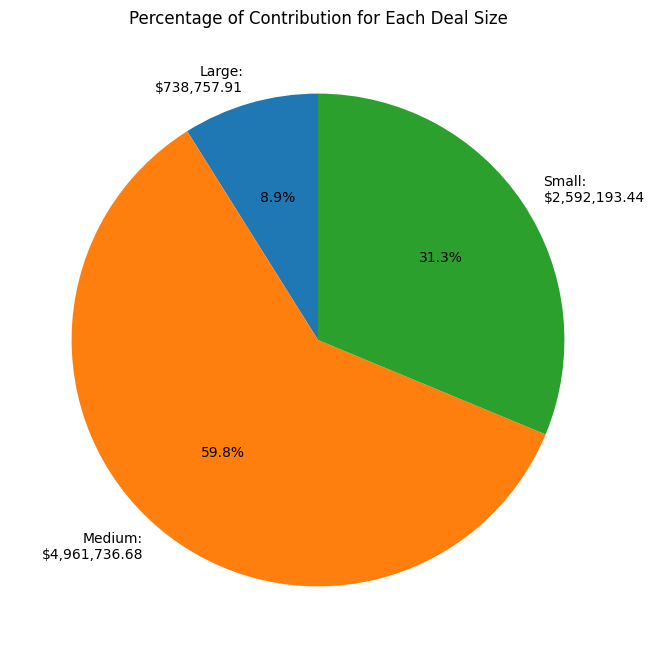

In [19]:
# Plotting Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_deal['PERCENTAGE'], labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of Contribution for Each Deal Size")
plt.show()

As we can see above, the medium deal size contributes almost 60% of the total sales, amounting to 4.9 million dollars. It is followed by the small deal size, which accounts for 31% with a total of 2.5 million dollars. Lastly, the large deal size makes up nearly 9%, totaling 738 thousand dollars.

Thank you very much @RevoU, for providing this case study through the Data Analytics Mini Course program, so I can learn and practice the data analytics knowledge using Python and sharpen my skill about understanding the business insight to identify opportunities for growth and improvement.